#Import important libraries

#Tableau Report Link
https://public.tableau.com/views/GoldPriceData/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#  Reading data

In [ ]:
 # Read the Monthlycsv dataset
monthlycsv = pd.read_csv('1683361656monthlycsv.csv', index_col ='Date', parse_dates= True)
print('shape of data',monthlycsv.shape)#shape of our data
# Print the first five rows of the dataset
monthlycsv.head()

shape of data (842, 1)


,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [ ]:
monthlycsv.tail()

,Price
Date,
2019-10-01,1494.765
2019-11-01,1471.921
2019-12-01,1480.025
2020-01-01,1560.668
2020-02-01,1598.818


#Basic EDA

<Axes: xlabel='Date'>

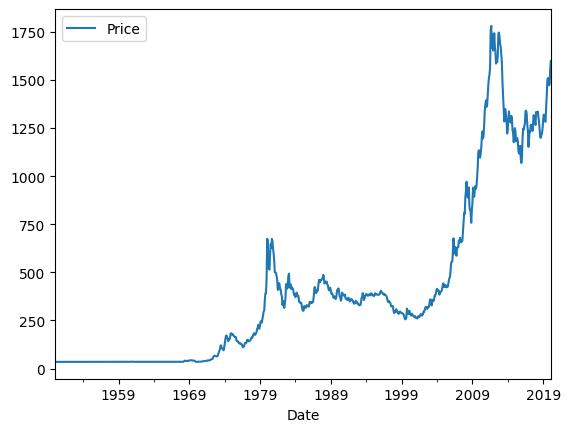

In [ ]:
monthlycsv.plot()

In [ ]:
monthlycsv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 842 entries, 1950-01-01 to 2020-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   842 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB


In [ ]:
monthlycsv.describe()

,Price
count,842.000000
mean,408.859108
std,443.787968
min,34.490000
25%,35.190000
50%,318.001000
75%,442.761500
max,1780.648000


In [ ]:
monthlycsv.isnull().sum()

Price    0
dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# ETS Decomposition
result = seasonal_decompose(monthlycsv['Price'], model ='multiplicative')

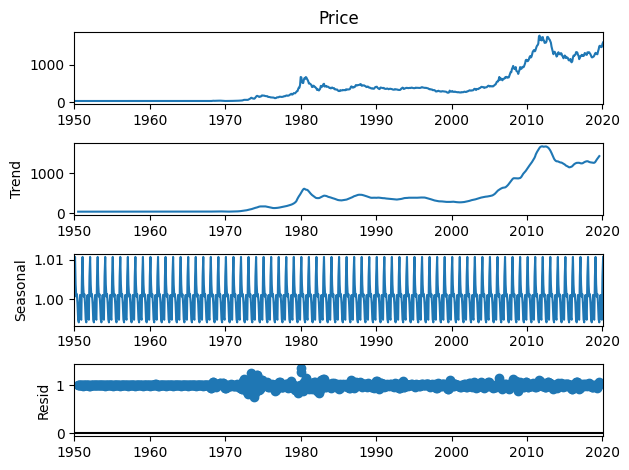

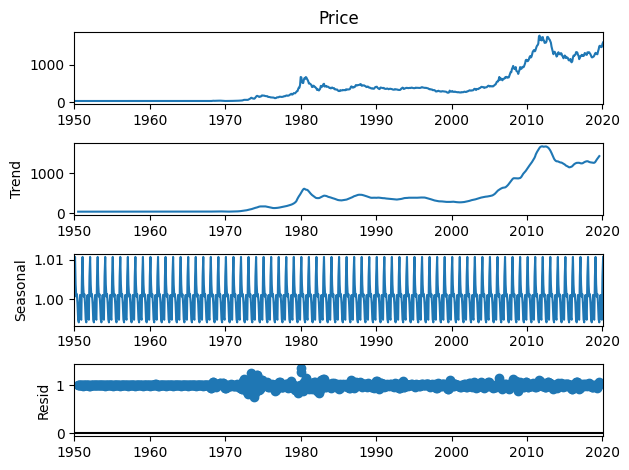

In [ ]:
# ETS plot
result.plot()

<Axes: xlabel='Date'>

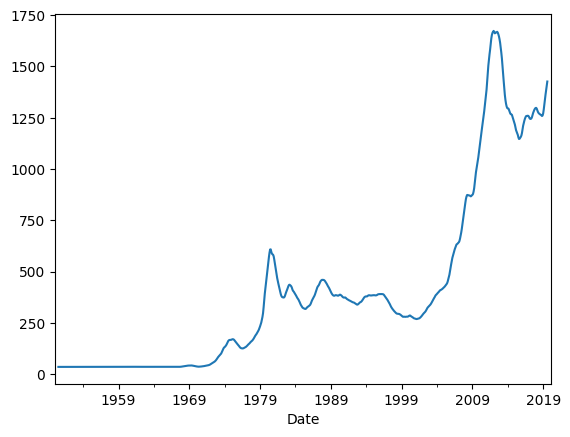

In [ ]:
result.trend.plot()


<Axes: xlabel='Date'>

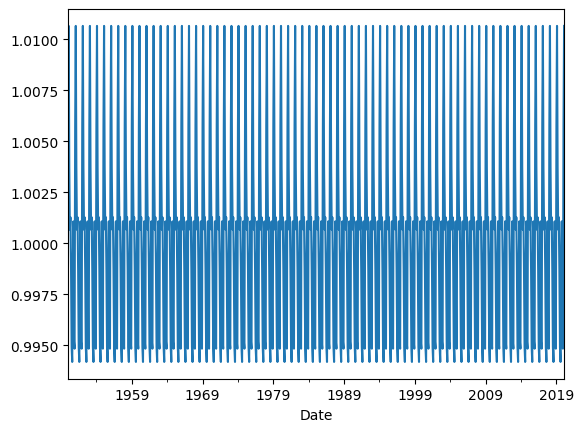

In [ ]:
result.seasonal.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# adfuller test for check stationarity of series
def adf_test(series):
  res=adfuller(series)
  print(f'Adf stats {res[0]} ')
  print(f'P value {res[1]} ')
  if res[1]<=0.05:
    print('rejects null hypothesis and it is stationary ')
  else:
    print('it is non stationary ')

In [ ]:
adf_test(monthlycsv['Price'])

Adf stats 0.29330705251473316 
P value 0.9770353256641069 
it is non stationary 


In [ ]:
# differencing
monthlycsv['Price_First_Difference'] =monthlycsv['Price'] - monthlycsv['Price'].shift(1)

In [ ]:
adf_test(monthlycsv['Price_First_Difference'].dropna())

Adf stats -6.874198974249547 
P value 1.4889775808879756e-09 
rejects null hypothesis and it is stationary 


In [ ]:
monthlycsv.head(20)

,Price,Price_First_Difference
Date,,
1950-01-01,34.73,NaN
1950-02-01,34.73,0.00
1950-03-01,34.73,0.00
1950-04-01,34.73,0.00
1950-05-01,34.73,0.00
1950-06-01,34.73,0.00
1950-07-01,34.73,0.00
1950-08-01,34.73,0.00
1950-09-01,34.73,0.00


<Axes: xlabel='Date'>

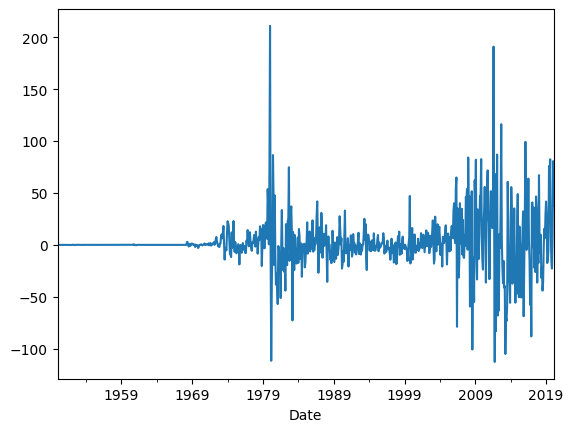

In [ ]:
monthlycsv['Price_First_Difference'].plot()#Our stationary data

In [ ]:
# Fit auto_arima function to goldpricecsv dataset
from pmdarima import auto_arima
stepwise_fit = auto_arima(monthlycsv['Price'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d= None, D= 1, trace = True,
error_action ='ignore', # we don't want to know if␣an order does not work
suppress_warnings = True, # we don't want␣convergence warnings
stepwise = True) # set to stepwise
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8186.758, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7924.575, Time=0.88 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8167.036, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7849.031, Time=3.72 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7880.000, Time=2.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7847.677, Time=3.78 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=7918.075, Time=3.30 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=9.51 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.92 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7848.342, Time=2.31 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  842
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -3914.460
Date:                             Tue, 23 May 2023   AIC                           7838.920
Time:                                     13:33:55   BIC                           7862.521
Sample:                                 01-01-1950   HQIC                          7847.971
                                      - 02-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6943      0.034    -20.380      0.000      -0.761      -0.628
ma.L1          0.8656      0.024     36.190      0.000       0.819       0.913
ar.S.L12      -0.6480      0.019    -34.018      0.000      -0.685      -0.611
ar.S.L24      -0.3002      0.018    -16.234      0.000      -0.336      -0.264
sigma2       734.0610     15.603     47.045      0.000     703.479     764.643
===================================================================================
Ljung-Box (L1) (Q):                   3.14   Jarque-Bera (JB):              4250.78
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):             333.12   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Split data into train / test sets
train = monthlycsv.iloc[:len(monthlycsv)-12]
test = monthlycsv.iloc[len(monthlycsv)-12:] # set one year(12 months) for testing
# Fit a SARIMAX(1, 1, 1)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Price'],
order = (1, 1, 1),
seasonal_order =(2, 1, 0, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  830
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -3850.149
Date:                             Tue, 23 May 2023   AIC                           7710.298
Time:                                     13:33:58   BIC                           7733.826
Sample:                                 01-01-1950   HQIC                          7719.328
                                      - 02-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7494      0.027    -28.094      0.000      -0.802      -0.697
ma.L1          0.9101      0.017     54.351      0.000       0.877       0.943
ar.S.L12      -0.6309      0.019    -33.228      0.000      -0.668      -0.594
ar.S.L24      -0.2964      0.019    -15.884      0.000      -0.333      -0.260
sigma2       720.3222     14.976     48.099      0.000     690.970     749.674
===================================================================================
Ljung-Box (L1) (Q):                   3.21   Jarque-Bera (JB):              4874.24
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):             522.82   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(monthlycsv)

842

<Axes: xlabel='Date'>

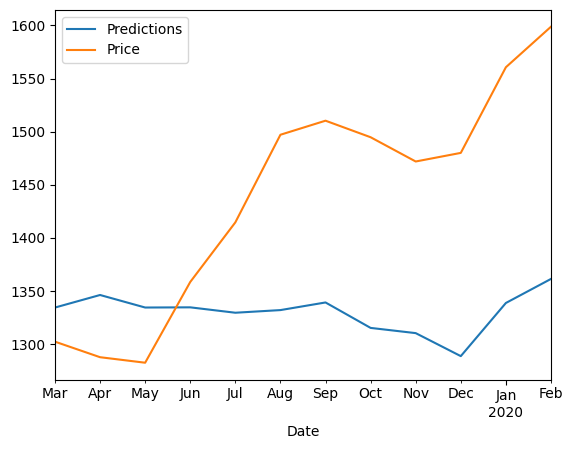

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,
typ = 'levels').rename("Predictions")
# plot predictions and actual values
predictions.plot(legend = True)
test['Price'].plot(legend = True)

In [ ]:
 # Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
rmse(test["Price"], predictions)

150.59156361847403

In [ ]:
 # Calculate mean squared error
mean_squared_error(test["Price"], predictions)

22677.81903305691

#Forecast using ARIMA Model

<Axes: xlabel='Date'>

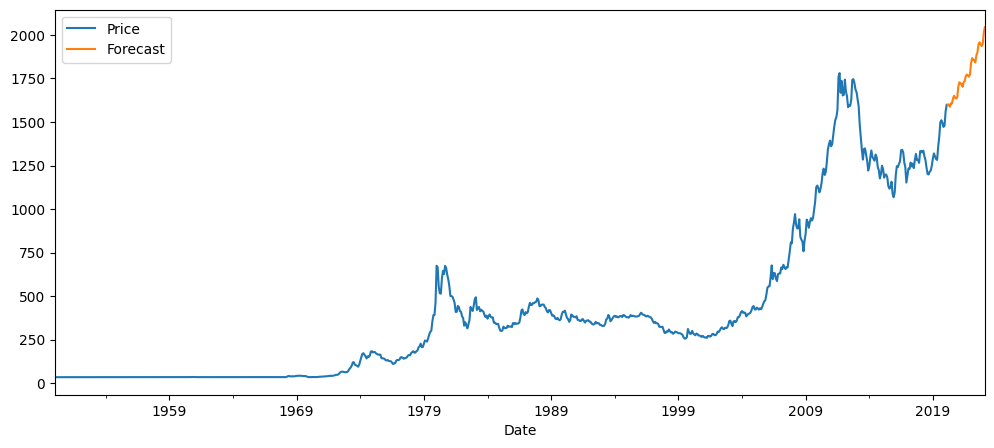

In [ ]:
 # Train the model on the full dataset
model = SARIMAX(monthlycsv['Price'],
order = (1, 1, 1),
seasonal_order =(2, 1, 0, 12))
result = model.fit()
# Forecast for the next 3 years
forecast = result.predict(start = len(monthlycsv),
end = (len(monthlycsv)-1) + 3 * 12,
typ = 'levels').rename('Forecast')
# Plot the forecast values
monthlycsv['Price'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

#Tableau Report Link
https://public.tableau.com/views/GoldPriceData/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link